# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

## Task 1: Load the Data

In [2]:
df = pd.read_excel("/home/jovyan/work/Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Task 2: Explore the data

1. Check the types of data

In [4]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

2. Rename the column names 

In [5]:
df = df.rename(columns={"InvoiceNo": "invoice_no", "StockCode": "stock_code", "Description": "prod_desc", "Quantity": "quantity","InvoiceDate": "invoice_date", "UnitPrice": "unit_price", "CustomerID": "customer_id", "Country": "country"})
df.head(5)

,invoice_no,stock_code,prod_desc,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


3. Check size of the dataset

In [6]:
df.shape

(541909, 8)

# Task 3: Clean and Validate the Data

1. Check and drop the duplicate records

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [8]:
df = df.drop_duplicates()

2. Check size of the dataset after dropping duplicate records

In [9]:
df.shape

(536641, 8)

3. Detect outliers for unit_price columns

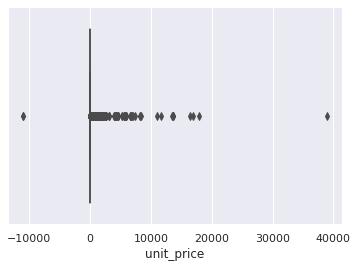

In [10]:
sns.boxplot(x=df['unit_price'])

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

quantity          9.00
unit_price        2.88
customer_id    2845.00
dtype: float64

# Task 4: Analyze the Data

1. Extract month_name (name of the month) and year from invoice_date column for ease of computation

In [12]:
df['month_name'] = df['invoice_date'].dt.month_name()
df['year'] = df['invoice_date'].dt.year
df.head()

,invoice_no,stock_code,prod_desc,quantity,invoice_date,unit_price,customer_id,country,month_name,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010


### Number of Orders by Month in 2010 and 2011

In [13]:
monthly_orders_count = df.groupby(['month_name', 'year'])['invoice_no'].count().unstack()
monthly_orders_count.head()

year,2010,2011
month_name,,
April,NaN,29701.0
August,NaN,35064.0
December,41981.0,25246.0
February,NaN,27479.0
January,NaN,34900.0


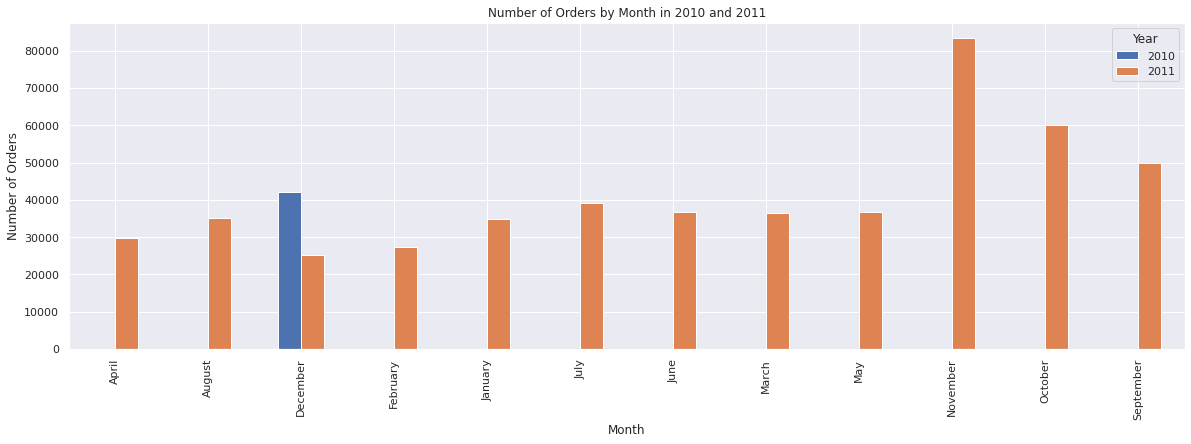

In [14]:
plt.figure(figsize=(20, 6))
monthly_orders_count.plot(kind='bar', ax=plt.gca())
plt.title('Number of Orders by Month in 2010 and 2011')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Year')
plt.show()

### Monthly Sales Trends

In [15]:
df['month'] = df['invoice_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['quantity'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

In [16]:
monthly_sales.head()

,month,quantity
0,2010-12,341038
1,2011-01,308281
2,2011-02,277374
3,2011-03,351165
4,2011-04,288237


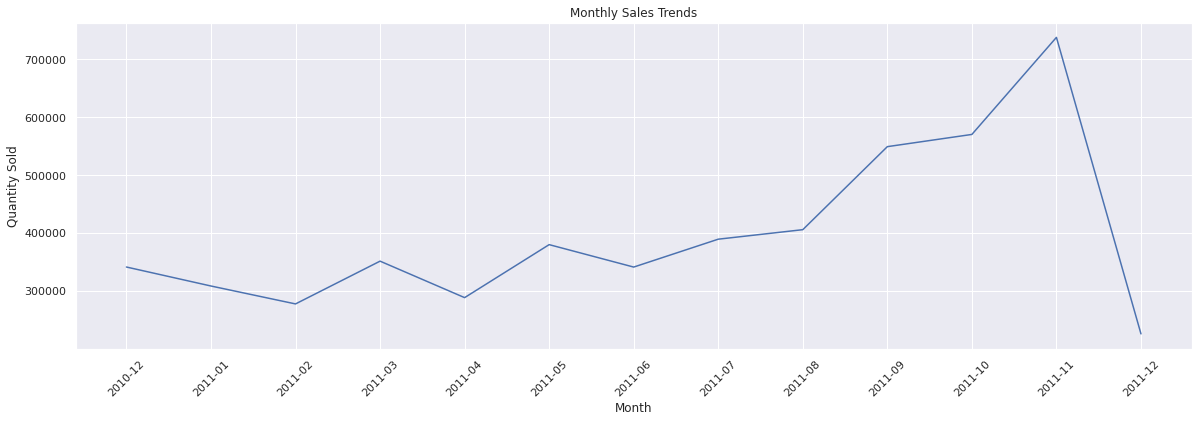

In [17]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=monthly_sales, x='month', y='quantity')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### Top 10 Best-Selling Products

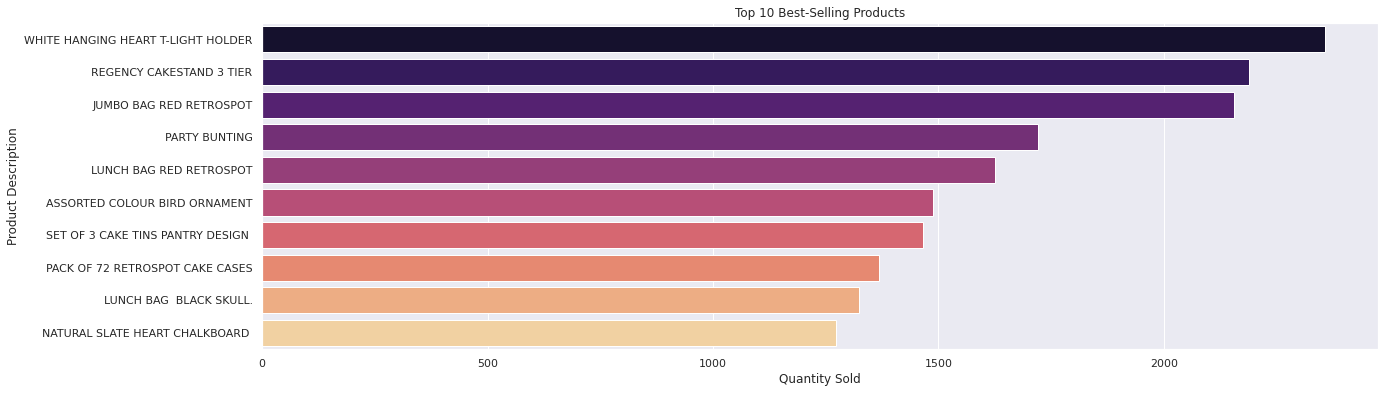

In [18]:
top_products = df.groupby('prod_desc')['quantity'].count().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=top_products, x='quantity', y='prod_desc', palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

### Top 10 Least-Selling Products

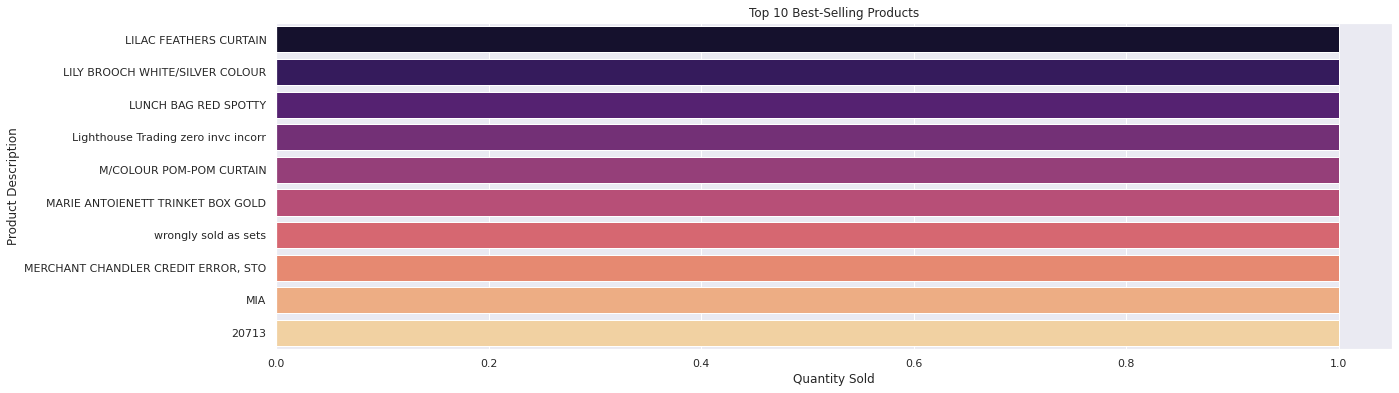

In [19]:
top_products = df.groupby('prod_desc')['quantity'].count().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=top_products, x='quantity', y='prod_desc', palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

### Top 3 Countries with the Highest Quantity of Products Sold

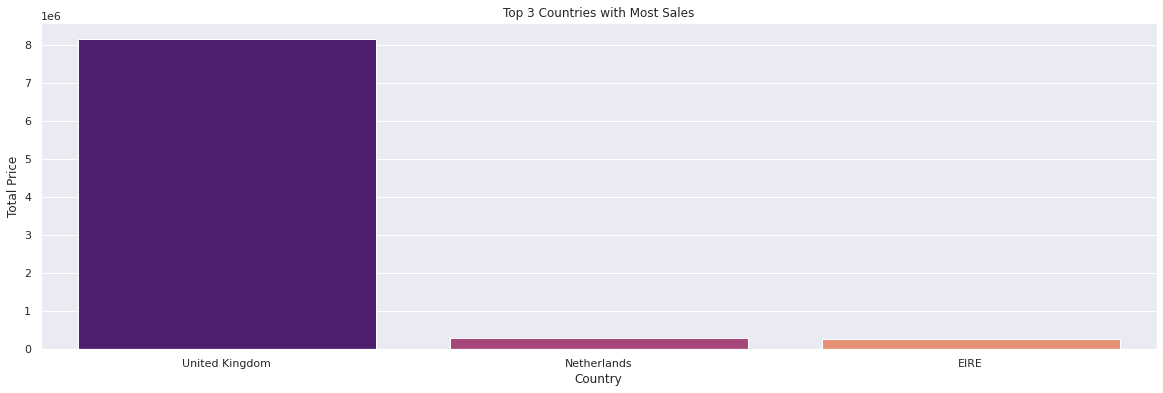

In [20]:
df['total_price'] = df['quantity'] * df['unit_price']
top_countries = df.groupby('country')['total_price'].sum().sort_values(ascending=False).head(3).reset_index()

plt.figure(figsize=(20, 6))
barplot = sns.barplot(data=top_countries, x='country', y='total_price', palette='magma')
plt.title('Top 3 Countries with Most Sales')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.show()

### Top 10 Most Valuable Customers

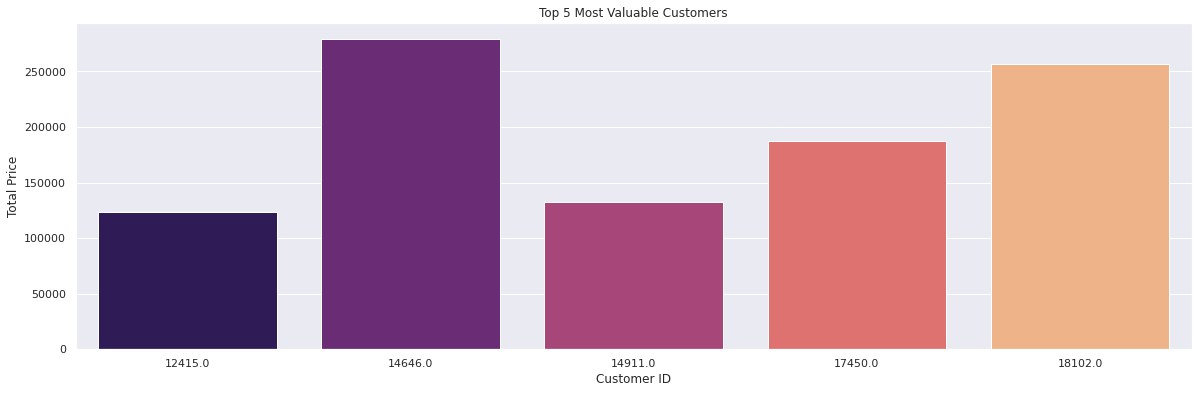

In [21]:
df['total_price'] = df['quantity'] * df['unit_price']
top_customers = df.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=top_customers, x='customer_id', y='total_price', palette='magma')
plt.title('Top 5 Most Valuable Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Price')
plt.show()

# Task 5: Findings and Conclusions 

After analysing the data we have come to the following conclusions:

1. Gradual Increase in Sales: The online retail company experiences a steady rise in sales leading up to the end of the year.

2. Peak Order Months: The number of orders is notably high in September and October, peaking in November.

3. Top Ordering Country: The United Kingdom places the most orders for products.

4. Best-Selling Products: Decoration items such as T-light holders, 3-tier cake stands, and party buntings are among the top-selling products.

5. Seasonal Dip in Orders: There is a noticeable decline in orders during December and January across both years.

Recommendations Based on Analytics

1. Increase Marketing: Focus on enhancing product marketing and digital advertising in countries with lower order rates to boost sales.
2. Enhance Product Branding: Improve the branding and visibility of products with lower order numbers to attract more customers.
3. Promote Discounts and Offers: Provide more information about discounts and special offers to increase the number of orders and overall sales.
4. Categorize Products: Categorize products into groups such as home decor, electronics, and cooking to gain deeper insights and tailor marketing strategies accordingly.

### Conclusion

Through this project, I thoroughly explored and analyzed a dataset from a UK-based non-store online retail company, covering transactions between 01/12/2010 and 09/12/2011. The objective was to gain valuable insights into sales trends, customer behavior, and popular products.

The process began with data pre-processing, which involved removing duplicate values, cleaning the data, and creating new columns (month_name and year) by extracting relevant metadata. Following this, I conducted Exploratory Data Analysis (EDA) to derive meaningful insights from the retail sales data.

By performing EDA, I identified outliers, sales patterns, and correlations between different variables. I created visualization plots and provided statistical analysis to highlight key indicators:
1. Number of orders for each month from 2010-2011.
2. Monthly sales trends.
3. Top 10 best and least selling products.
4. Top 3 countries outside the UK with the highest quantity of products sold.
5. Top 10 most valuable customers of the company.

This project provides actionable insights that can guide strategic business decisions and enhance the store's overall performance in the future. The findings and recommendations aim to optimize sales strategies, improve product visibility, and increase customer engagement, ultimately driving better results for the online retail company.

© Subarna Paul 2024